<a href="https://colab.research.google.com/github/mjkchae/SAIHST_medical_machine_learning/blob/main/Assignment_7_2021711176_%EC%B5%9C%EB%AF%BC%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assingment \#6 (Programming Assignment)

## Description : Using fashion_mnist Dataset, create a Convolutional Neural Networks (CNN) model that exceeds 80% accuracy for the test dataset.

## [Assignment Submission Checklist]
### 1) If you want to use additional packages, you can do. But it is enough provided.
### 2) [IMPORTANT] You should print your model accuracy on test dataset.
### 3) [IMPORTANT] Your code must include more than 2 augmentation techniques.
### 4) Before save and download your .ipynb file for submission, you SHOULD run all cells in .ipynb file to print your results.
### 5) If you have a question about Assignment \#5, send email to "jockerd@g.skku.edu"

## 0. Import Packages

In [59]:
!pip install tensorflow==2.6.0

### >>> DO NOT MODIFY >>> ###

import numpy as np
import tensorflow as tf

print("{:15}".format("tensorflow"), tf.__version__)         # (Tested) 2.6.0

### <<< DO NOT MODIFY <<< ###

tensorflow      2.6.0


## 1. Load dataset
Fashion_mnist Dataset : 60,000 28x28 grayscale images of 10 fashion categories,

Training set : 60,000 examples  
Test set : 10,000 examples  

Each example : 28\*28\*1 greyscale image  
Label : 10 classes

API : https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data


In [110]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [111]:
print(train_data.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [112]:
print(test_data.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


In [113]:
train_images = train_data.reshape((60000, 28, 28, 1))
test_images = test_data.reshape((10000, 28, 28, 1))

print('train image shape : {}'.format(train_images.shape))
print('test image shape : {}'.format(test_images.shape))

train image shape : (60000, 28, 28, 1)
test image shape : (10000, 28, 28, 1)


In [114]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## 2. Preprocess dataset

In [115]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets, layers, models

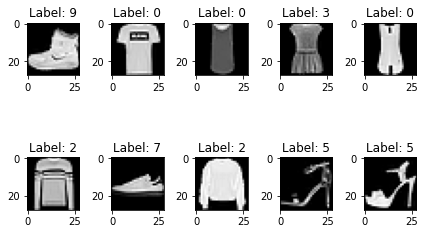

In [117]:
num_row = 2
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col)
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(train_images[i][:,:,0], cmap='gray')
    ax.set_title('Label: {}'.format(train_labels[i]))
plt.tight_layout()
plt.show()

In [118]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [119]:
gen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.5,
        zoom_range=(0.9, 1.1),
        horizontal_flip=False,
        vertical_flip=False,
        fill_mode='constant',
        cval=0
)

In [120]:
gen.fit(train_images)

## 3. Modeling

In [121]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same')) 
model.add(layers.MaxPooling2D((2, 2)))

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 14, 14, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [122]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_9 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)              

In [125]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(gen.flow(train_images, train_labels, batch_size=32),validation_data=(test_images, test_labels) ,epochs=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.3752 - accuracy: 0.8591 - val_loss: 0.3391 - val_accuracy: 0.8787
Epoch 2/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.3596 - accuracy: 0.8662 - val_loss: 0.3318 - val_accuracy: 0.8811
Epoch 3/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.3482 - accuracy: 0.8707 - val_loss: 0.3085 - val_accuracy: 0.8877
Epoch 4/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.3391 - accuracy: 0.8726 - val_loss: 0.3108 - val_accuracy: 0.8929
Epoch 5/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.3319 - accuracy: 0.8762 - val_loss: 0.3256 - val_accuracy: 0.8841
Epoch 6/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.3276 - accuracy: 0.8781 - val_loss: 0.3010 - val_accuracy: 0.8936
Epoch 7/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.3204 - accuracy: 0.8815 - val_loss: 0.3092 -

In [126]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Test Accuracy : {:.2f}'.format(test_acc))

313/313 - 2s - loss: 0.2875 - accuracy: 0.8977
Test Accuracy : 0.90
